# Data visualization using python
This file contain the different plots for the Instacart Basket Analysis

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
#Creating a path for this project
file_path = r"D:\career Foundary\Data_immersion\4_python_projects\Instacart Basket Analysis"


In [3]:
# Importing 'orders_products_merged.pkl' via pandas.pkl and os.path.join
df_customer_prod_merge = pd.read_pickle(os.path.join(file_path, '02 Data','Prepared Data', 'customer_prod_merge.pkl'))

In [10]:
df_customer_prod_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spendi

In [4]:
#checking imported file 
df_customer_prod_merge.shape

(32404859, 31)

### Barcharts

<AxesSubplot:>

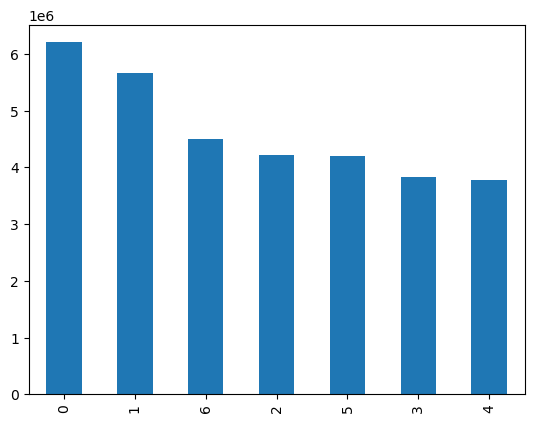

In [6]:
# creating  bar charts
df_customer_prod_merge['orders_day_of_week'].value_counts().plot.bar()

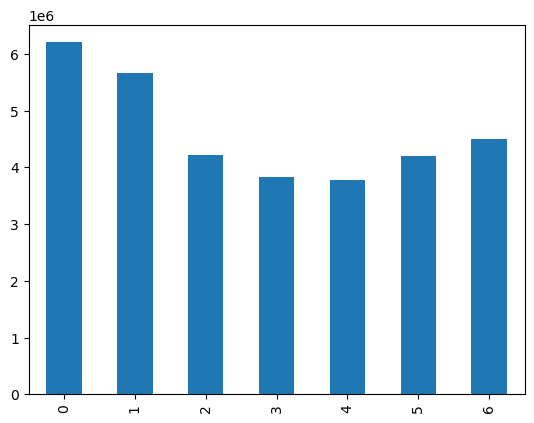

In [33]:
# Sorting
Bar_chart_orders_week = df_customer_prod_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

### Histogram

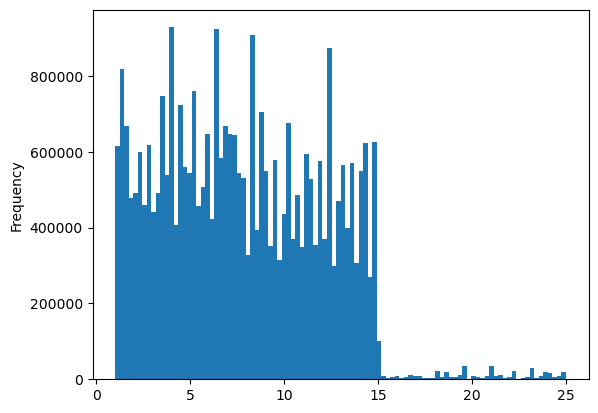

In [11]:
# Creating a histogram for prices
hist_prices = df_customer_prod_merge['prices'].plot.hist(bins = 100)

### Scatterplot

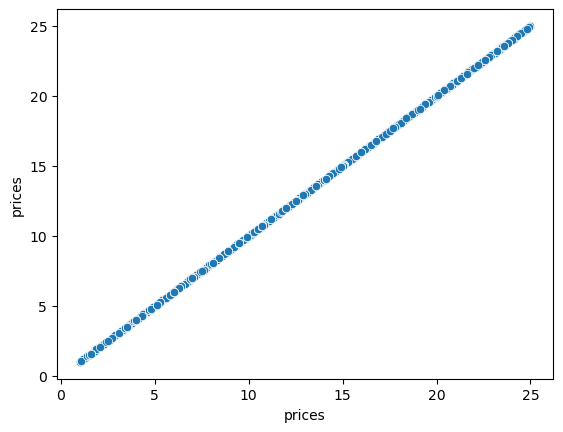

In [12]:
scatterplot_of_prices = sns.scatterplot(x = 'prices', y = 'prices',data = df_customer_prod_merge)


### Sampling data

In [14]:
# Create a list holding true/false values to test np.random.rand()<= 0.7
np.random.seed(4)
Result = np.random.rand(len(df_customer_prod_merge)) <= 0.7


array([False,  True, False, ...,  True,  True,  True])

In [ ]:
Result

In [15]:
# Store 70 % of the sample in dataframe 
Big_70 = df_customer_prod_merge[Result]

In [16]:
# Store 30 % of the sample in dataframe 
Small_30 = df_customer_prod_merge[~Result]

In [17]:
# Checking partition accurracy
len(df_customer_prod_merge)

32404859

In [18]:
# Checking partition accurracy
len(Big_70) + len(Small_30)

32404859

In [19]:
# creating a subset data frame for our line chart
df_small_30 = Small_30[['orders_day_of_week','prices']]

### Line chart

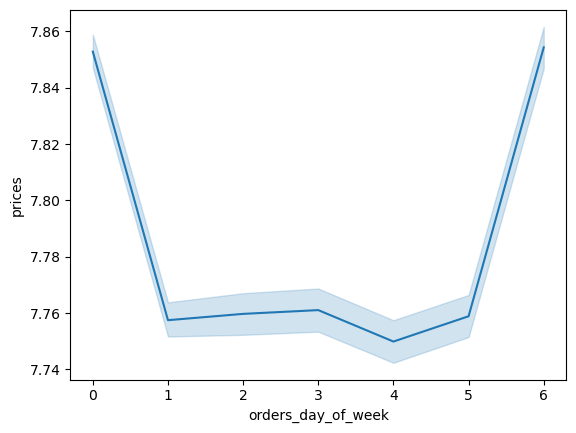

In [20]:
# creat a line chart
line_chart_of_week_prices = sns.lineplot(data = df_Small_30, x = 'orders_day_of_week',y = 'prices')

### You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.¶
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

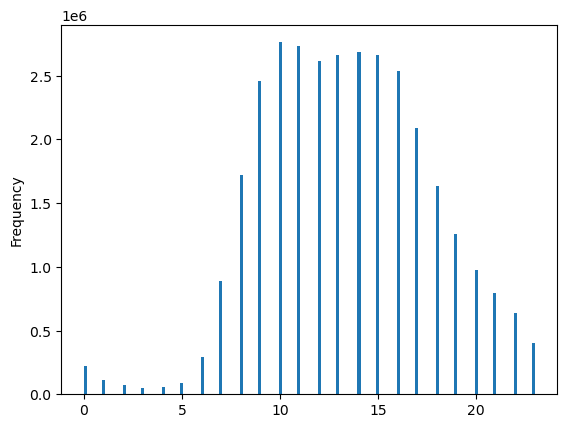

In [22]:
hist_order_hour_of_day = df_customer_prod_merge['order_hour_of_day'].plot.hist(bins = 150)

#### The histogram is showing the frequency values of orders per hour in the whole dataset

### The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

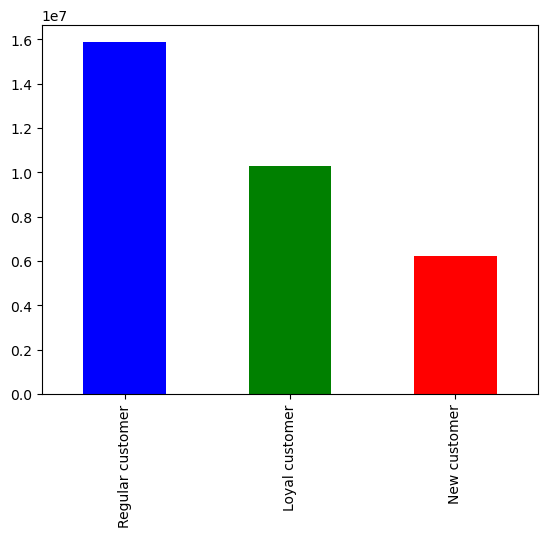

In [24]:
#creating a bar chart
Barchart_loyalty_customers = df_customer_prod_merge['loyalty_flag'].value_counts().plot.bar(color = ['blue', 'green', 'red'])

###  Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [25]:
# creating a line chart, For this we first need a subset of the df
df_order_hour_of_day_prices = Small_30[['order_hour_of_day','prices']]

In [26]:
df_order_hour_of_day_prices.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


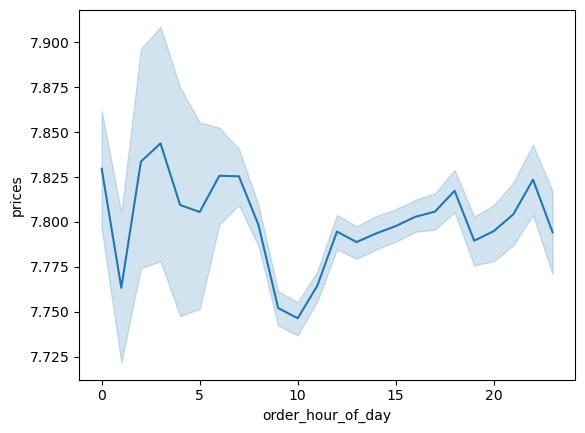

In [27]:
# creating a line chart of hour and prices
line_chart_order_hour_of_day_prices = sns.lineplot(data = df_order_hour_of_day_prices, x = 'order_hour_of_day',y = 'prices')

###  Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows

In [28]:
#creating subset for the line chart 
df_age_dependants = Small_30[['age','number_dependants']]

In [29]:
df_age_dependants.head()

,age,number_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


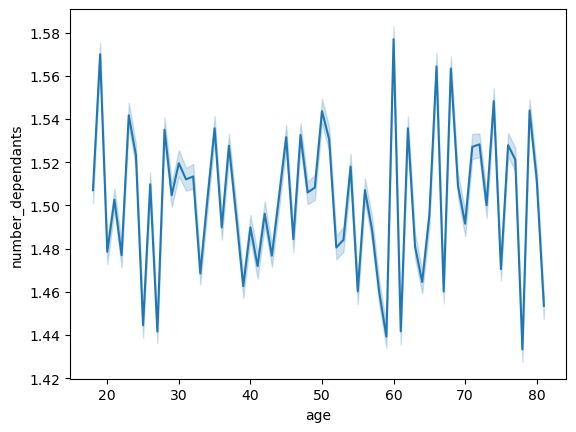

In [30]:
#creating line chart 
line_chart_age_dependants = sns.lineplot(data = df_age_dependants, x = 'age',y = 'number_dependants')

#### The line chart shows age vs number of dependants. It is difficult to draw conclutions from this chart. There is a lot going on.

###  You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [31]:
# defining df subset for scatterplot
df_age_income = Small_30[['age','income']]

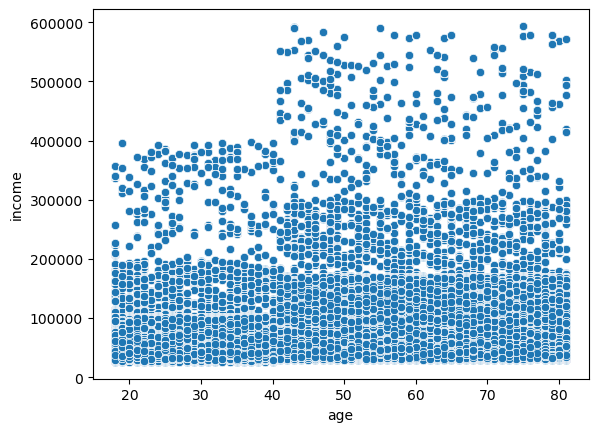

In [32]:
# creating scatterplot
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_age_income)

##### The scatter plot is representing age as the independable variable and income as the dependable variable.  There seems to be a positive correlation between age and income. Lower income values are seen from people below 40 years old. On the other side, after 40, income increases considerably.

### Export your visualizations as “.png” files in your relevant project folder.¶

In [34]:
# Exporting .png
Bar_chart_orders_week.figure.savefig(os.path.join(file_path, '04 Analysis','Visualizations', 'Bar_chart_orders_week.png'))

In [35]:
hist_prices.figure.savefig(os.path.join(file_path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [36]:
scatterplot_of_prices.figure.savefig(os.path.join(file_path, '04 Analysis','Visualizations', 'scatterplot_of_prices.png'))

In [37]:
line_chart_of_week_price.figure.savefig(os.path.join(file_path, '04 Analysis','Visualizations', 'line_chart_week_prices.png'))

In [38]:
hist_order_hour_of_day.figure.savefig(os.path.join(file_path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [39]:
Barchart_loyalty_customers.figure.savefig(os.path.join(file_path, '04 Analysis','Visualizations', 'barchart_loyalty_customers.png'))

In [40]:
line_chart_order_hour_of_day_prices.figure.savefig(os.path.join(file_path, '04 Analysis','Visualizations', 'line_chart_order_hour_of_day_prices.png'))

In [41]:
line_chart_age_dependants.figure.savefig(os.path.join(file_path, '04 Analysis','Visualizations', 'line_chart_age_dependants.png'))

In [42]:
scatterplot_age_income.figure.savefig(os.path.join(file_path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))